In [1]:
!pip install tensorflow
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-no


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Dense, Flatten

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [6]:
from tensorflow.keras.optimizers import Adam

In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
from tensorflow.keras.datasets import cifar10

In [10]:
from matplotlib import pyplot as plt

In [11]:
#load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [12]:
Classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"]

The class is"BIRD"


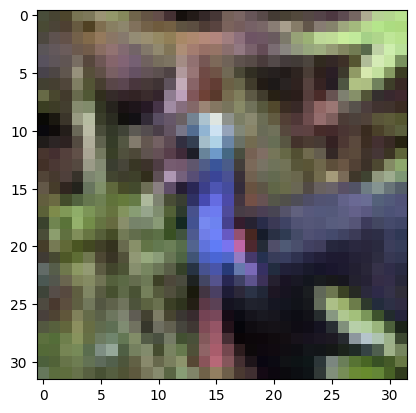

In [13]:
#16,17,18
sample_index = 24
sample_image = x_train[sample_index]
sample_label = y_train[sample_index]

print(f"The class is\"{Classes[sample_label[0]].upper()}\"")
plt.imshow(sample_image)

In [14]:
print(f"The size of the image is: {sample_image.shape}")

The size of the image is: (32, 32, 3)


In [15]:
#normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#Convert class vectors to binary class matrics
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = x_train.shape[1:]),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [17]:
#Complete teh model
model.compile(optimizer = Adam(), loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [18]:
#Train the model
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10


1563/1563 [==============================] - 49s 29ms/step - loss: 1.4213 - accuracy: 0.4887 - val_loss: 1.1123 - val_accuracy: 0.6083
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9892 - accuracy: 0.6531 - val_loss: 0.9297 - val_accuracy: 0.6744
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8201 - accuracy: 0.7138 - val_loss: 0.8738 - val_accuracy: 0.7031
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7052 - accuracy: 0.7532 - val_loss: 0.8255 - val_accuracy: 0.7209
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6156 - accuracy: 0.7856 - val_loss: 0.7847 - val_accuracy: 0.7348
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.5434 - accuracy: 0.8076 - val_loss: 0.8244 - val_accuracy: 0.7301
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4718 - accuracy: 0.8334 - val_loss: 0.8160

In [19]:
#Evaluate the model
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9562844038009644
Test accuracy: 0.732200026512146


The random number is 4326


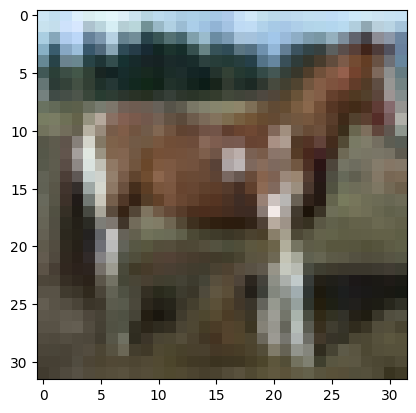

1/1 [==============================] - 0s 63ms/step
The image belongs to"horse"


In [21]:
#selecting range index
random_image_index = np.random.randint(x_test.shape[0])
print(f"The random number is {random_image_index}")

#diplaying the random image
plt.imshow(x_test[random_image_index])
plt.show()

#prepare the image
img = np.expand_dims(x_test[random_image_index], axis = 0)

#making the prediction
prediction = model.predict(img)

#predicted class
predicted_class = Classes[np.argmax(prediction)]
print(f"The image belongs to\"{predicted_class}\"")